
# Ex4 - ML

##### HELEN YONAS - הלן יונס  -  207521998

# Q1

## Dataset



In [1]:
""" 
    Importing dependencies 
""" 
import numpy as np   # For math and matrix operations
import matplotlib.pyplot as plt  # For visualizing the data
import math
import pandas as pd
from sklearn.model_selection import train_test_split


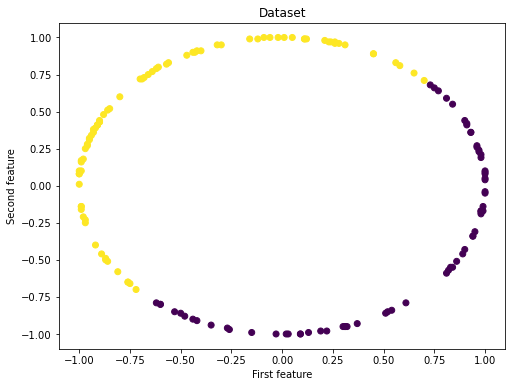

In [2]:
""" 
    #Plotting The data
""" 
ss=[]
sss=[]

data = np.genfromtxt('two_circle.txt', delimiter=' ')

for line in data:
    ss.append([line[2]])
    sss.append([line[0],line[1]])
    
X = np.array(sss)
Y = np.array(ss)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
df = pd.read_csv("two_circle.txt")
df.head()

,0.22 -0.98 -1
0,1.00 0.09 -1
1,-1.00 0.10 1
2,0.94 -0.34 -1
3,-0.90 0.43 1
4,0.89 -0.46 -1


## K Nearest Neighbors

In [4]:
def knn(train,test,k,norm):
    successes=0
    pred = []
    for row_ in test:
        neighbors = []
        distances_p = []
        for row1 in train:
            distance_=np.linalg.norm(row_[:2] - row1[:2], ord=norm)
            distances_p.append((row1, distance_))
        distances_p.sort(key=lambda tup: tup[1]) 
        for i in range(k):
            neighbors.append(distances_p[i][0])
        res = [row[-1] for row in neighbors]
        pred.append( max(set(res), key=res.count))
    real_tag = [point[-1] for point in test]
    for i in range(len(real_tag)):
        if real_tag[i] == pred[i]:
            successes += 1
    return ((np.array(real_tag) - np.array(pred)) ** 2).mean(),successes/float(len(real_tag)) * 100.0

In [5]:
dataset = []
k_ = [1, 3, 5, 7, 9] #For each of k=1,3,5,7,9
p_ = [1, 2, np.inf] #and p=1,2,∞
scores_train=np.zeros(shape=(len(p_), len(k_)))
train_err=np.zeros(shape=(len(p_), len(k_)))
scores=np.zeros(shape=(len(p_), len(k_)))
errs = np.zeros(shape=(len(p_), len(k_)))

In [6]:
with open('two_circle.txt', 'r') as text:
    for line in text.readlines():
        x_, y_, tag = line.split()
        dataset.append((float(x_), float(y_), int(tag)))
data = np.array(dataset) #to np array
for i in range(100):
    for p in range(len(p_)):
        for k in range(len(k_)):
            #Train Test Split
            train, test = train_test_split(data, test_size=0.5)  #Sample 75 training points from the set 
            error, accur = knn(train,test,k_[k],p_[p])
            error__, accur__ = knn(train,train,k_[k], p_[p])
            train_err[p][k] += error__
            scores_train[p][k] += accur__
            errs[p][k] += error
            scores[p][k] += accur    
#average
errs /= 100
scores /= 100
train_err /= 100
scores_train /= 100

## Results - train

In [7]:
print("The errors are:",train_err)
print("The accuracy are:",scores_train)

The errors are: [[0.         0.01813333 0.03306667 0.04746667 0.05813333]
 [0.         0.01706667 0.03626667 0.05013333 0.0512    ]
 [0.         0.0208     0.0496     0.06613333 0.07733333]]
The accuracy are: [[100.          99.54666667  99.17333333  98.81333333  98.54666667]
 [100.          99.57333333  99.09333333  98.74666667  98.72      ]
 [100.          99.48        98.76        98.34666667  98.06666667]]


### Choosing a K and P Values

In [8]:
best_p=best_k = 0
best_err = np.inf
for p, norms in enumerate(train_err):
    for k, norm in enumerate(norms):
        if norm < best_err:
            best_err = norm
            best_p = p
            best_k = k
best_p += 1
if best_p == 3:
    best_p = np.inf
    
print("The best k,p are:")
print("the best k is:", best_k * 2 + 1)
print("the best p is:",best_p)
print("with error of:",best_err)


The best k,p are:
the best k is: 1
the best p is: 1
with error of: 0.0


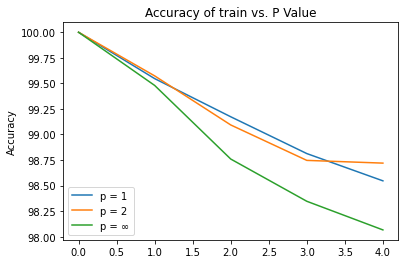

In [14]:
plt.plot(scores_train[0],label="p = 1")
plt.plot(scores_train[1],label="p = 2")
plt.plot(scores_train[2],label="p = ∞")
plt.legend(loc="lower left")
plt.title("Accuracy of train vs. P Value")
plt.ylabel('Accuracy')
plt.show()

## Results - test

In [10]:
print("The errors are:",errs)
print("The accuracy are:",scores)

The errors are: [[0.04213333 0.06826667 0.0816     0.088      0.08426667]
 [0.04586667 0.08       0.0816     0.112      0.09226667]
 [0.056      0.07626667 0.11146667 0.1456     0.1536    ]]
The accuracy are: [[98.94666667 98.29333333 97.96       97.8        97.89333333]
 [98.85333333 98.         97.96       97.2        97.69333333]
 [98.6        98.09333333 97.21333333 96.36       96.16      ]]


### Choosing a K and P Values

In [11]:
best_p=best_k = 0
best_err = np.inf
for p, norms in enumerate(errs):
    for k, norm in enumerate(norms):
        if norm < best_err:
            best_err = norm
            best_p = p
            best_k = k
best_p += 1
if best_p == 3:
    best_p = np.inf
    
print("The best k,p are:")
print("the best k is:", best_k * 2 + 1)
print("the best p is:",best_p)
print("with error of:",best_err)



The best k,p are:
the best k is: 1
the best p is: 1
with error of: 0.0421333333333333


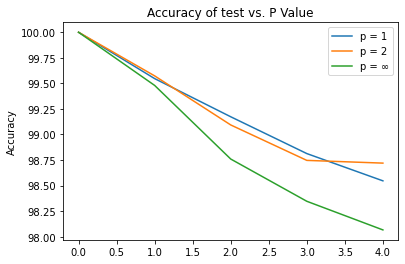

In [13]:
plt.plot(scores_train[0],label="p = 1")
plt.plot(scores_train[1],label="p = 2")
plt.plot(scores_train[2],label="p = ∞")
plt.legend(loc="upper right")
plt.title("Accuracy of test vs. P Value")
plt.ylabel('Accuracy')
plt.show()


###### It can be seen that as p increases there are more errors and the accuracy decreases.